# MTH9879 Homework 6

Assigned: March 21, 2017.
Due: April 4, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\EE}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

* **Author: Hongchao Pan**
* Kernel Version: R 3.3.2
* Packages/Libraries: 
* Notes:

In [1]:
# Load libraries
library(repr)

### 0. (0 points) 
Read the review article by McAleer and Medeiros and also the nice article by Barndorff-Nielsen et al.

## Comparison of estimators

### Download RV estimator code

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")

### 1. (12 points) 
This assignment uses the *tqBAC* dataset from *tq.rData* and the RV estimators from *RvEstimators.R*.

In [3]:
load('tq.rData')
library(highfrequency)
source('RvEstimators.R')

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



(a) Consider the BAC trade price series.  Superimpose signature plots of the following estimators with subsampling frequency $q$ from 1 to 20: ZHOU, TSRV, MSRV, KRVTH, KRVC.  Express your results as $\sqrt{RV}$ to make them more intuitive, as in Table 1 of Lecture 6 (recall that volatility estimates should be of the order of $2\%$!).
<br>
Pay attention to good aesthetics, addling a proper legend to your plot.

(b) Repeat part (a) for the BAC mid-quote series.

(c) Which of these estimators do you recommend and why?  What sub-sampling frequency do you recommend based on these pictures?

### Answer of Q1

#### Answer of (a): Plot $\sqrt{RV}$ VS subsampling frequency $q$

* Compute $\sqrt{RV}$s

In [4]:
# Get the price of tqBAC
px <- tqBAC$PRICE
p <- as.numeric(px)

# Get realized variance by using ZHOU, TSRV, MSRV, KRVTH, KRVC defined in RvEstimator.R
# After looking at the function RVGAMMA(), the inputs of ZHOU/TSRV/MSRV/KRVTH/KRVC is log(p) and q

rZHOU<- function(q){
    return (sqrt(ZHOU(log(p),q)))
}

rTSRV<- function(q){
    return (sqrt(TSRV(log(p),q)))
}

rMSRV<- function(q){
    return (sqrt(MSRV(log(p),q)))
}

rKRVTH<- function(q){
    return (sqrt(KRVTH(log(p),q)))
}

rKRVC<- function(q){
    return (sqrt(KRVC(log(p),q)))
}

# Compute the RV
rvZHOU <- sapply(1:20,rZHOU)
rvTSRV <- sapply(1:20,rTSRV)
rvMSRV <- sapply(1:20,rMSRV)
rvKRVTH <- sapply(1:20,rKRVTH)
rvKRVC <- sapply(1:20,rKRVC)


* Plot $\sqrt{RV}$ VS subsampling frequency $q$

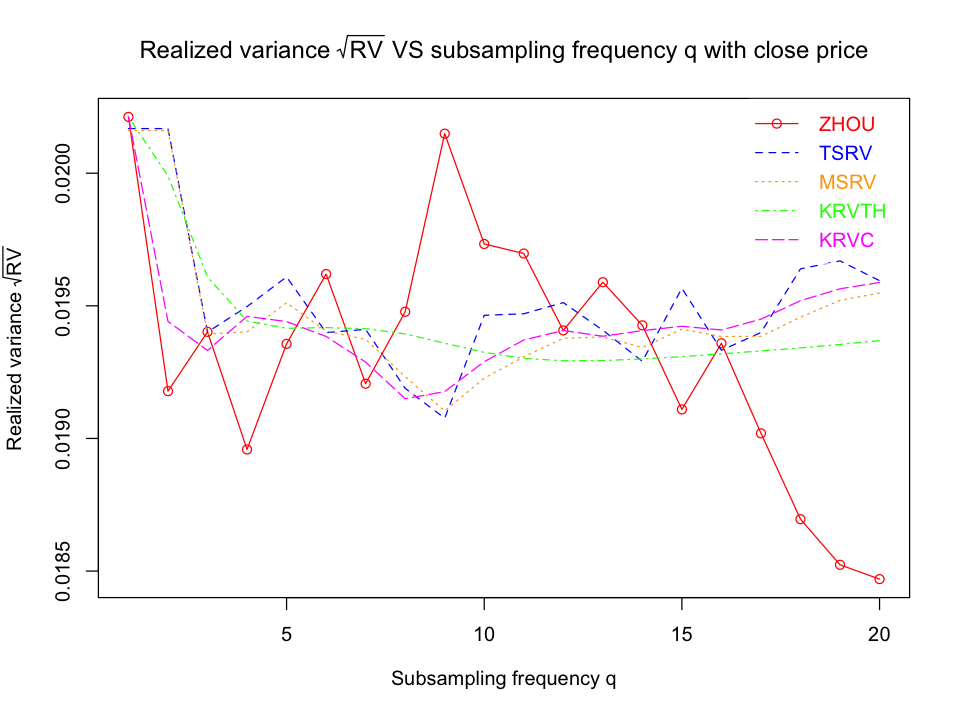

In [5]:
options(repr.plot.height=6, repr.plot.width=8)
plot(1:20,rvZHOU,xlab=expression(paste("Subsampling frequency ",q)),
     ylab=expression(paste("Realized variance ",sqrt(RV))),type='o',col='red')
lines(1:20,rvTSRV,lty=2,col='blue')
lines(1:20,rvMSRV,lty=3,col='orange')
lines(1:20,rvKRVTH,lty=4,col='green')
lines(1:20,rvKRVC,lty=5,col=rainbow(6)[6])
legend('topright',c('ZHOU','TSRV','MSRV','KRVTH','KRVC'),
      lty=c(1,2,3,4,5),pch=c(1,NA,NA,NA,NA),
       col=c('red','blue','orange','green',rainbow(6)[6]),
      text.col=c('red','blue','orange','green',rainbow(6)[6]),
      y.intersp=1.5,cex=1, inset=0.002,box.col='white')
title(expression(paste("Realized variance ",sqrt(RV),
                       " VS subsampling frequency q with close price")))

Figure 1. Realized variance $\sqrt{RV}$ from different subsampling frequency $q$ and close price with different methods

#### Answer of (b): Repeat (a) for mid-price

In [6]:
# Get the mid-price of tqBAC
p_mid <- (as.numeric(tqBAC$BID)+as.numeric(tqBAC$OFR))/2

# Get realized variance by using ZHOU, TSRV, MSRV, KRVTH, KRVC defined in RvEstimator.R
# After looking at the function RVGAMMA(), the inputs of ZHOU/TSRV/MSRV/KRVTH/KRVC is log(p) and q

rZHOUmid<- function(q){
    return (sqrt(ZHOU(log(p_mid),q)))
}

rTSRVmid<- function(q){
    return (sqrt(TSRV(log(p_mid),q)))
}

rMSRVmid<- function(q){
    return (sqrt(MSRV(log(p_mid),q)))
}

rKRVTHmid<- function(q){
    return (sqrt(KRVTH(log(p_mid),q)))
}

rKRVCmid<- function(q){
    return (sqrt(KRVC(log(p_mid),q)))
}

# Compute the RV
rvZHOUmid <- sapply(1:20,rZHOUmid)
rvTSRVmid <- sapply(1:20,rTSRVmid)
rvMSRVmid <- sapply(1:20,rMSRVmid)
rvKRVTHmid <- sapply(1:20,rKRVTHmid)
rvKRVCmid <- sapply(1:20,rKRVCmid)


* New plot with mid-price

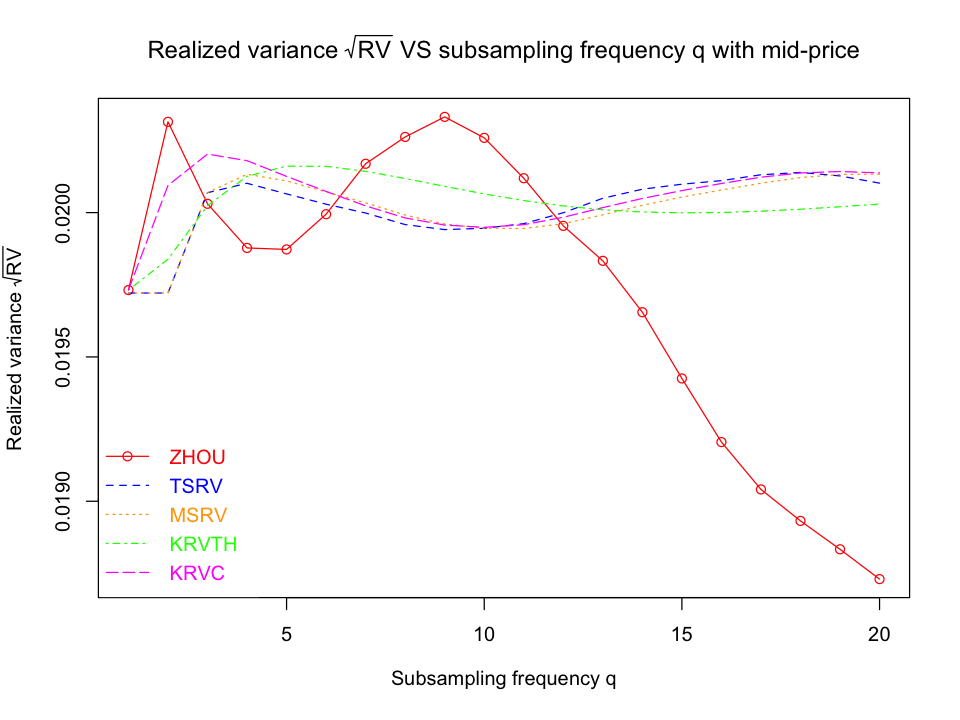

In [7]:
options(repr.plot.height=6, repr.plot.width=8)
plot(1:20,rvZHOUmid,xlab=expression(paste("Subsampling frequency ",q)),
     ylab=expression(paste("Realized variance ",sqrt(RV))),type='o',col='red')
lines(1:20,rvTSRVmid,lty=2,col='blue')
lines(1:20,rvMSRVmid,lty=3,col='orange')
lines(1:20,rvKRVTHmid,lty=4,col='green')
lines(1:20,rvKRVCmid,lty=5,col=rainbow(6)[6])
legend('bottomleft',c('ZHOU','TSRV','MSRV','KRVTH','KRVC'),
      lty=c(1,2,3,4,5),pch=c(1,NA,NA,NA,NA),
       col=c('red','blue','orange','green',rainbow(6)[6]),
      text.col=c('red','blue','orange','green',rainbow(6)[6]),
      y.intersp=1.5,cex=1, inset=0.002,box.col='white')
title(expression(paste("Realized variance ",sqrt(RV),
                       " VS subsampling frequency q with mid-price")))

Figure 2. Realized variance $\sqrt{RV}$ from different subsampling frequency $q$ and mid-price with different methods

#### Answer of (c): Which estimator do you recommend and why? Which subsampling frequency do you recommend?

* Compute the difference of $\sqrt{RV}$ between two methods (trades and mid-quotes)

In [8]:
# Differences between trades-mid-quotes
diffZHOU<- rvZHOU-rvZHOUmid
diffTSRV<- rvTSRV-rvTSRVmid
diffMSRV<- rvTSRV-rvMSRVmid
diffKRVTH<- rvTSRV-rvKRVTHmid
diffKRVC<- rvTSRV-rvKRVCmid

* Plot the differences

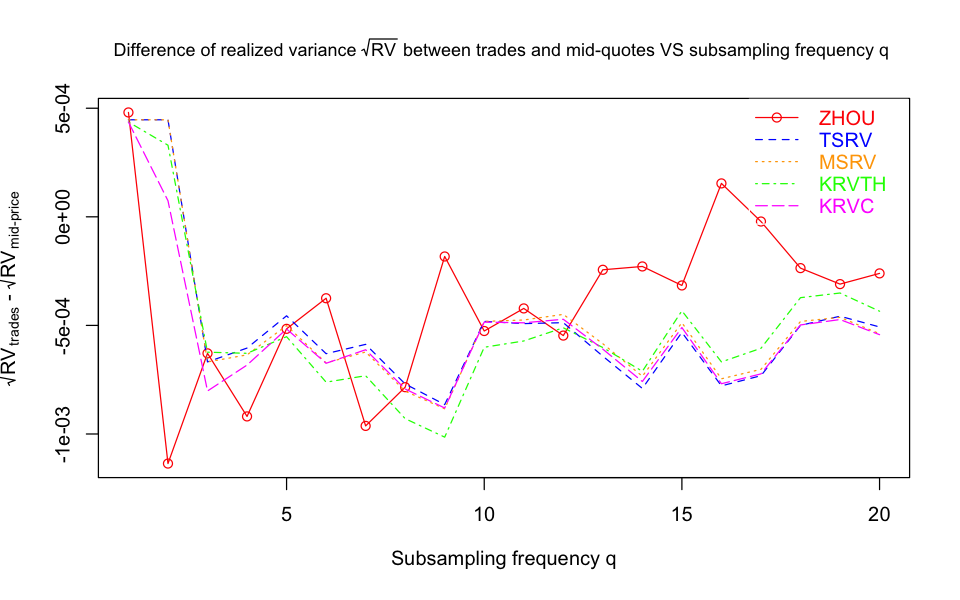

In [9]:
options(repr.plot.height=5, repr.plot.width=8)
plot(1:20,diffZHOU,xlab=expression(paste("Subsampling frequency ",q)),
     ylab=expression(paste(sqrt(RV)['trades'],' - ',sqrt(RV)['mid-price'])),
     type='o',col='red')
lines(1:20,diffTSRV,lty=2,col='blue')
lines(1:20,diffMSRV,lty=3,col='orange')
lines(1:20,diffKRVTH,lty=4,col='green')
lines(1:20,diffKRVC,lty=5,col=rainbow(6)[6])
legend('topright',c('ZHOU','TSRV','MSRV','KRVTH','KRVC'),
      lty=c(1,2,3,4,5),pch=c(1,NA,NA,NA,NA),
       col=c('red','blue','orange','green',rainbow(6)[6]),
      text.col=c('red','blue','orange','green',rainbow(6)[6]),
      y.intersp=1.5,cex=1, inset=0.002,box.col='white')
title(expression(paste("Difference of realized variance ",sqrt(RV),
                       " between trades and mid-quotes VS subsampling frequency q ")),
     cex.main=0.9)

Figure 3. Differences of realized variance $\sqrt{RV}$ of trades - mid-quotes with different subsampling frequency $q$

**Observations:**

* From Figure 1 and Figure 2, we can see that all estimators looks good with range (0.019-0.02) and smooth except ZHOU's estimator, which implies that all estimators can be recommended except ZHOU's.

* KRVTH estimator is the best smooth estimator and converges to flat fastest, which implies that KRVTH is the best estimator among all estimators for tqBAC data.

* With subsampling frequency $q=9$, $\sqrt{RV}_{trades}-\sqrt{RV}_{mid-quotes}$ is minimized and most of the estimators converges to flat. Also the differences of $\sqrt{RV}_{trades}-\sqrt{RV}_{mid-quotes}$ is only $5e^{-5}$ between $q=5$ and $q=9$, which is consistent with the statement in the lecture notes that $q=5$ is the most used subsampling frequency. Therefore based on these, I would recommend subsampling frequency be 5 or 9.

## The Epps effect

### 2. (14 points) 
For this assignment, use the *tqBAC* and  *tqC* datasets from *tq.rData*, the function *getSymbols* from the *quantmod* package, and the function *aggregatets* from the * highfrequency* package.

In [10]:
load('tq.rData')
library(highfrequency)
library(quantmod)

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘quantmod’

The following objects are masked from ‘package:highfrequency’:

    getPrice, has.Qty



(a) Write a function to aggregate a *tq* object (such as *tqBAC*) to the nearest $k$ seconds. <br>
(Hint: Use the function *aggregatets(.)*).

(b) Write a function to compute the correlation between two high-frequency log return series (in *tq* format) where the underlying prices have been aggregated to the nearest $k$ seconds.

(c) Plot the correlation between BAC and C returns where these returns are sampled every $k$ seconds, with $ k  \in \{2,3,4,. .., 599,600\} $.  Use a kernel smoothing function such as *ksmooth* to smooth your results.  Make sure the aesthetics are good with nice labels etc.

(d)  Is your plot consistent with the Epps effect?  What was the intraday correlation between BAC and C returns on 04-May-2012?

(e) Use the function *getSymbols* from *quantmod* to download daily data for BAC and C from 01-Jan-2012 to 31-Dec-2012.  What was the historical correlation of daily BAC and C returns over that period?

#### Answer of (a): write a function to aggregate a tq object to th enearest $k$ seconds

* Reference: https://cran.r-project.org/web/packages/highfrequency/highfrequency.pdf

In [11]:
# Aggregrate function
tqagg_ks<- function(tq,ks){
    return (aggregatets(tq,on='seconds',k=ks))
}

#### Answer of (b): Write a function to compute the correlation between two high-frequency log return series

In [12]:
# Correlation function of two series has been aggregated to the nearest k seconds
tqcorr_ks<- function(tq1,tq2,k){
    # Get the aggregated objects
    aggr1<- tqagg_ks(tq1,k)
    aggr2<- tqagg_ks(tq2,k)
    # Compute the logreturn
    log1<- diff(log(aggr1))[-1] # Drop 1st NA element
    log2<- diff(log(aggr2))[-1] # Drop 1st NA element
    
    return (cor(log1,log2)) # Return the correlation between two logreturns
#    return (log1)  # Check whether the 1st element of log1 and log2 is NA or not
}

In [13]:
# Compute the correlation between BAC and C with given aggegrated seconds
tq1<- tqBAC$PRICE
tq2<- tqC$PRICE
kmax<- 600
BACcorrC <- sapply(2:kmax, function(k){tqcorr_ks(tq1,tq2,k)})


In [22]:
# Smooth the result by using ksmooth
Smoothcorr<- ksmooth(2:kmax,BACcorrC,kernel = "normal",bandwidth = 10)

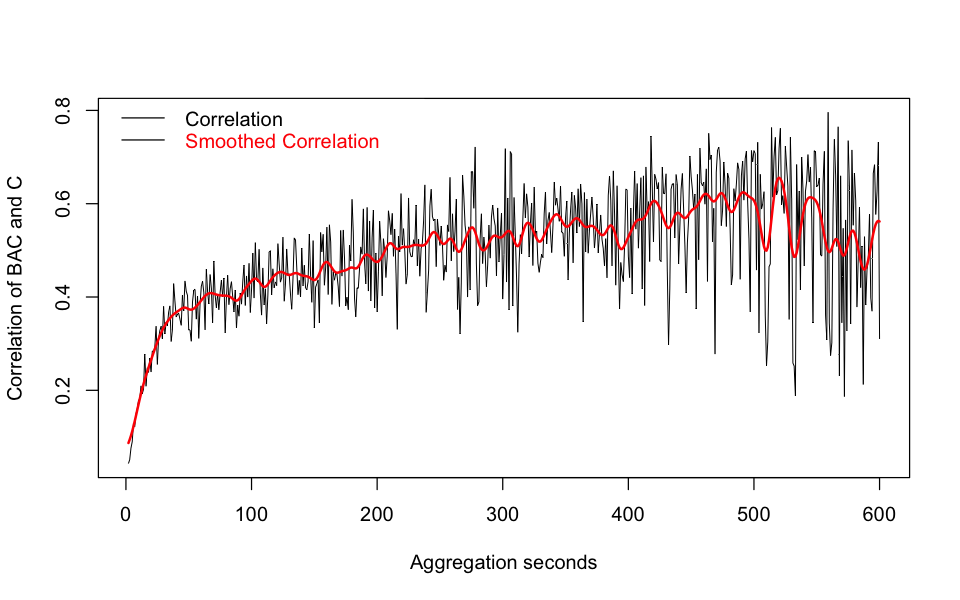

In [27]:
# Plot the correlation between BAC and C
options(repr.plot.height=5, repr.plot.width=8)
plot(2:kmax, BACcorrC, type='l',col='black',xlab='Aggregation seconds',
    ylab='Correlation of BAC and C',lwd=0.8)
lines(Smoothcorr$x,Smoothcorr$y,lty=1,col='red',lwd=2)
legend('topleft',c('Correlation','Smoothed Correlation'),lty=c(1,1),
      text.col=c('black','red'),y.intersp=1.5,cex=1, inset=0.003,box.col='white')

Figure 4. Correlation of BAC and C before (black) and after (red) smoothing

#### Answer of (d): Epps effect? What was the intraday correlation between BAC and C returns on 04-May-2012?

* ***Epps Effect***

*   The natural estimator of covariance is just

    $$\frac{1}{T}\,\sum_{i=1}^T\,\Delta p^{(1)}_i\,\Delta p^{(2)}_i$$
    
    where $p^{(1)}$ and $p^{(2)}$ are prices of two assets.


* The *Epps Effect* describing the relationship of natural estimator of covariance with sampling frequency: The natural estimator of covariance decreases as sampling frequency increases. And $p^{(i)}$ are usually asynchronous.


* The sampling frequency $q$ has negative relation of aggregation seconds $k$, i.e., $q$ increases as $k$ decreases.


* From Figure 4., we observed that the correlation of BAC and C decreases roughly from 0.8 to 0.05 as $k$ decreases from 600 to 2. This implies that the correlation of BAC and C decreases as $q$ increases and then we can deduce that $p^{BAC}$ and $p^{C}$ are asynchronous. Therefore, the *Epps Effect* is consistent with Figure 4.

* **Intraday correlation**

* After looking at the data of tqBAC and tqC, the data we used for computing correlation is data on 04-May-2012.


* From Figure 4, we observed that the correlation of BAC and C converges to roughtly 0.5 as $k$ increases.


* As $k$ has negative relation with sampling frequency $q$, the higher $k$, the lower $q$, the more data used for computing correlation of BAC and C.


* Therefore, we could conclude the intraday correlation of BAC and C is roughly 0.5.

#### Answer of (e): What was the historical correlation of daily BAC and C returns over 01-Jan-2012 to 31-Dec-2012

* Get the historical data
    * Ref: http://gekkoquant.com/2012/05/13/quantmod-basics-stock-data-download-and-manipulation/

In [44]:
# Get the data from Yahoo finance
stockData <- new.env() #Make a new environment for quantmod to store data in

#Specify period of time we are interested in 
startDate <- as.Date("2012-01-01") 
endDate <- as.Date("2012-12-31")

#Define the tickers we are interested in
tickers <- c("BAC","C") 
 
#Download the stock history (for all tickers) from Yahoo Finance
getSymbols(tickers, env = stockData, src = "yahoo", from = startDate, to = endDate)
 
#Use head to show first six rows of matrix
head(stockData$BAC)
head(stockData$C)

[1] "BAC" "C"

           BAC.Open BAC.High BAC.Low BAC.Close BAC.Volume BAC.Adjusted
2012-01-03     5.75     5.89    5.74      5.80  246293200     5.540424
2012-01-04     5.71     5.88    5.62      5.81  243711200     5.549976
2012-01-05     5.75     6.35    5.71      6.31  547780000     6.027599
2012-01-06     6.21     6.30    6.06      6.18  299630600     5.903417
2012-01-09     6.26     6.37    6.19      6.27  240614400     5.989389
2012-01-10     6.44     6.66    6.44      6.63  354292100     6.333278

           C.Open C.High C.Low C.Close C.Volume C.Adjusted
2012-01-03  27.13  28.51 27.13   28.33 58169500   27.82710
2012-01-04  28.04  28.38 27.62   28.17 41455000   27.66994
2012-01-05  27.66  29.18 27.47   28.51 66793300   28.00390
2012-01-06  28.66  29.06 28.01   28.55 48226900   28.04319
2012-01-09  28.72  29.38 28.65   29.08 35017900   28.56378
2012-01-10  29.75  30.14 29.66   30.00 47710900   29.46745

Table 1. Overview of histotical data retrived from Yahoo Finance by *getSymbols()*

* Plot the adjusted prices of BAC and C to check whether outliers exist

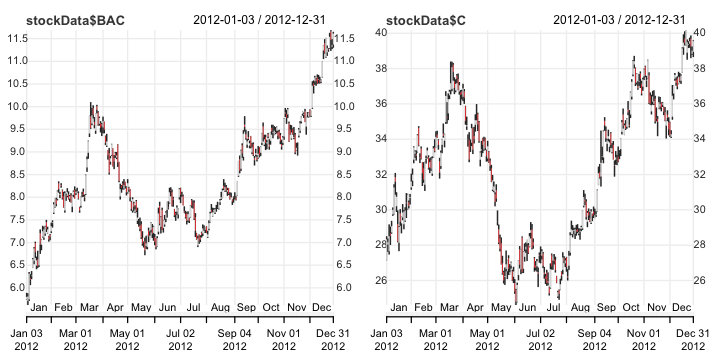

In [83]:
options(repr.plot.height=3, repr.plot.width=6)
par(mfrow = c(1,2))
chart_Series(stockData$BAC)
chart_Series(stockData$C)

Figure 5. Overview of histotical data of BAC and C over 01-Jan-2012 to 31-Dec-2012

In [82]:
# No outliers exist in Figure 5
# Use the adjusted prices for BAC and C
hisBAC<- subset(stockData$BAC,select=c("BAC.Adjusted"))
hisC<- subset(stockData$C,select=c("C.Adjusted"))
head(hisBAC)

           BAC.Adjusted
2012-01-03     5.540424
2012-01-04     5.549976
2012-01-05     6.027599
2012-01-06     5.903417
2012-01-09     5.989389
2012-01-10     6.333278

In [88]:
# Compute the correlation of BAC and C historical logreturns
# Avoid 1st NA element
hisCorr<- cor(diff(log(hisBAC))[-1],diff(log(hisC))[-1])
cat("The historical correlation of daily BAC and C returns over 
01-Jan-2012 to 31-Dec-2012 is: ",hisCorr)

The historical correlation of daily BAC and C returns over 
01-Jan-2012 to 31-Dec-2012 is:  0.7999082

## The Hayashi-Yoshida estimator

### 3. (2 points) 
Show that when two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, the Hayashi-Yoshida estimator coincides with the realized covariance estimator.

## Fulvio Corsi's HAR-RV model

The following code loads the data of SPX realized volatility required for this problem. Data were downloaded from the Oxford-Man website

In [15]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/spx_krv.rData_.zip", destfile="spx_krv.zip")
unzip(zipfile="spx_krv.zip")
load("spx_krv.rData")

In [16]:
data.frame(head(spx.krv))

,head.spx.krv.
2000-01-03,0.0001607266
2000-01-04,0.0002643965
2000-01-05,0.0003046503
2000-01-06,0.0001485821
2000-01-07,0.0001232670
2000-01-10,0.0001306934


### 4. (12 points)

(a) Rerun the HAR-RV example code using the 2008 *DJI_RV* sample from the *highfrequency* package.

(b) Repeat the analysis of part (a) with *spx.krv* restricted to 2008.

(c) Tabulate the HAR-RV coefficients for the two 2008 datasets.  Are they similar or do they differ?  Is most weight on the 1-day, 5-day, or 22-day RV?

(d) Using *quantmod* download daily VIX data.  Subset this data to 2008 and plot ${\rm VIX}^2$.

(e)  Plot SPX RV and superimpose DJI RV for 2008. Superimpose a plot of $\text{VIX}^2$, adding a scale on the right hand axis (see how this is done in the lecture iPython notebook). Comment on the resulting plot.
